In [0]:
from keras import Model
from keras.datasets import fashion_mnist
from keras.layers import Input, Conv2D
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters

In [3]:
!pip install --upgrade scikit-image

    100% |████████████████████████████████| 26.3MB 1.7MB/s 
    100% |████████████████████████████████| 2.0MB 14.3MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1
  Found existing installation: scikit-image 0.13.1
    Uninstalling scikit-image-0.13.1:
      Successfully uninstalled scikit-image-0.13.1


In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
indices = [idx for idx in range(len(X_train)) if y_train[idx] == 0]
X_train = np.asarray([X_train[idx] for idx in indices], dtype=np.float32)

indices = [idx for idx in range(len(X_test)) if y_test[idx] == 0]
X_test = np.asarray([X_test[idx] for idx in indices], dtype=np.float32)

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)/255
X_test = X_test.reshape(-1, 28, 28, 1)/255

In [0]:
def show_images(images):
  f, ax = plt.subplots(1, 5)
  f.set_size_inches(10, 5)
  for i in range(5, 10):
    ax[i - 5].imshow(images[i].reshape(28, 28), cmap='Greys')
  plt.show()

In [0]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

X_train_n = seq_object.augment_images(X_train * 255)/255
X_test_n = seq_object.augment_images(X_test * 255)/255 

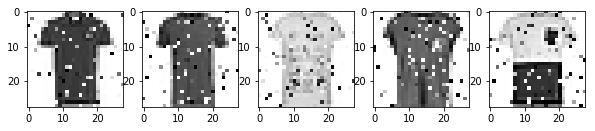

In [15]:
show_images(X_test_n[:10])


In [16]:
input_layer = Input(shape=(28, 28, 1))

encoded_layer_0 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer_0)

code = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_layer_1)
print(code.shape)

decoded_layer_0 = Conv2D(32, (3, 3), activation='relu', padding='same')(code)
decoded_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded_layer_0)

output_layer = Conv2D(1, (3, 3), activation='relu', padding='same')(decoded_layer_1)
print(output_layer.shape)

(?, 28, 28, 64)
(?, 28, 28, 1)


In [17]:
model = Model(input=input_layer, output=output_layer)
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_n, X_train, epochs=200, batch_size=1024, validation_data=(X_test_n, X_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


Train on 6000 samples, validate on 1000 samples
Epoch 1/200
6000/6000 [==============================] - 2s 251us/step - loss: 0.1151 - val_loss: 0.0594
Epoch 2/200
6000/6000 [==============================] - 1s 175us/step - loss: 0.0403 - val_loss: 0.0359
Epoch 3/200
6000/6000 [==============================] - 1s 176us/step - loss: 0.0259 - val_loss: 0.0245
Epoch 4/200
6000/6000 [==============================] - 1s 174us/step - loss: 0.0210 - val_loss: 0.0171
Epoch 5/200
6000/6000 [==============================] - 1s 173us/step - loss: 0.0163 - val_loss: 0.0146
Epoch 6/200
6000/6000 [==============================] - 1s 173us/step - loss: 0.0136 - val_loss: 0.0118
Epoch 7/200
6000/6000 [==============================] - 1s 175us/step - loss: 0.0109 - val_loss: 0.0095
Epoch 8/200
6000/6000 [==============================] - 1s 173us/step - loss: 0.0092 - val_loss: 0.0085
Epoch 9/200
6000/6000 [==============================] - 1s 173us/step - loss: 0.0083 - val_loss: 0.0076
Epoch 1

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 1)         145       
Total para

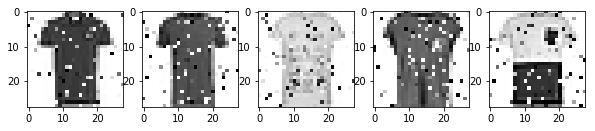

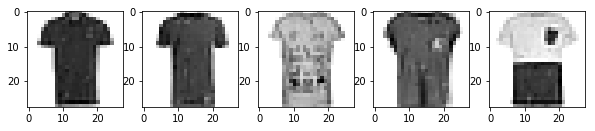

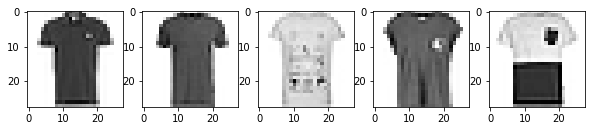

In [18]:
preds = model.predict(X_test_n[:10])
show_images(X_test_n[:10])
show_images(preds)
show_images(X_test[:10])